[ 74.    180.    181.    215.675] MHz
-0.2865136
11.424072265625 Jy
180.0 MHz


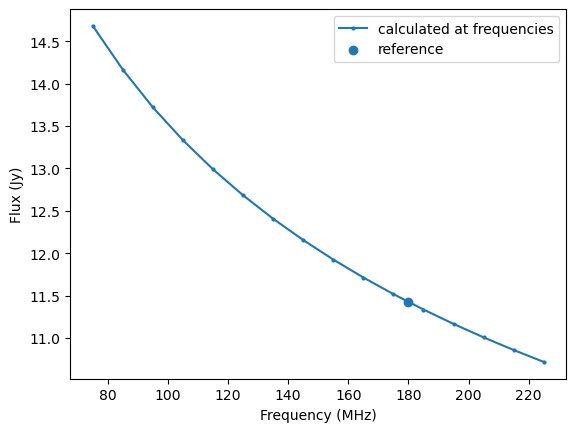

In [37]:
  >>> import os
  >>> from astropy import units
  >>> import numpy as np
  >>> import matplotlib.pyplot as plt
  >>> from pyradiosky import SkyModel
  >>> from pyradiosky.data import DATA_PATH
  >>> sm = SkyModel()

  >>> filename = os.path.join(DATA_PATH, "fhd_catalog.sav")
  >>> sm.read_fhd_catalog(filename)

  >>> print(np.unique(sm.reference_frequency.to("MHz")))
  # [ 74.    180.    181.    215.675] MHz

  >>> # pick a bright component with a non-zero spectral index
  >>> # (a spectral index of zero means that the flux is the same at all frequencies)
  >>> comp_use = 3437
  >>> print(sm.spectral_index[comp_use])
  # -0.8
  >>> print(sm.stokes[0,0,comp_use])
  # 99.7300033569336 Jy
  >>> print(sm.reference_frequency[comp_use].to("MHz"))
  # 74.0 MHz

  >>> freqs_calc = np.linspace(75, 225, 16) * units.MHz
  >>> sm_new = sm.at_frequencies(freqs=freqs_calc, inplace=False)
  >>> _ = plt.plot(freqs_calc, sm_new.stokes[0, :, comp_use], marker='o', markersize=2, label="calculated at frequencies")
  >>> _ = plt.scatter(sm.reference_frequency[comp_use].to("MHz"), sm.stokes.value[0,0,comp_use], label="reference")
  >>> _ = plt.xlabel("Frequency (MHz)")
  >>> _ = plt.ylabel("Flux (Jy)")
  >>> _ = plt.legend()
  >>> plt.show() # doctest: +SKIP
